In [347]:
# Topic:        Project 1
# Subject:      Exploratory Data Analysis (EDA) of MTA turnstile data
# Date:         2021
# Name:         Mada 

In [415]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
# You can configure the format of the images: ‘png’, ‘retina’, ‘jpeg’, ‘svg’, ‘pdf’.
%config InlineBackend.figure_format = 'svg'
# this statement allows the visuals to render within your Jupyter Notebook
%matplotlib inline 

Read Data from MTA Website

In [511]:
def get_data(num_weeks):
    url = 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt'
    file_list=[]
    
    for num_week in num_weeks:
        file_url = url.format(num_week)
        file_list.append(pd.read_csv(file_url))
    return pd.concat(file_list)

num_weeks = [200905,200912,200919,200926,201003,201010,201017,201024,201107,201114,201121,201128,201205,201212]

df = get_data(num_weeks)

# Exploring the Dataset

In [512]:
#check

df.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/29/2020,00:00:00,REGULAR,7450785,2533372
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/29/2020,04:00:00,REGULAR,7450788,2533375
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/29/2020,08:00:00,REGULAR,7450798,2533391
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/29/2020,12:00:00,REGULAR,7450826,2533423
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/29/2020,16:00:00,REGULAR,7450910,2533454
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/29/2020,20:00:00,REGULAR,7451020,2533470
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/30/2020,00:00:00,REGULAR,7451092,2533482
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/30/2020,04:00:00,REGULAR,7451095,2533482
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/30/2020,08:00:00,REGULAR,7451100,2533487
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/30/2020,12:00:00,REGULAR,7451117,2533516


In [513]:
#Checking DataFrame size

df.shape

(2941595, 11)

In [514]:
#Checking info about dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2941595 entries, 0 to 210402
Data columns (total 11 columns):
 #   Column                                                                Dtype 
---  ------                                                                ----- 
 0   C/A                                                                   object
 1   UNIT                                                                  object
 2   SCP                                                                   object
 3   STATION                                                               object
 4   LINENAME                                                              object
 5   DIVISION                                                              object
 6   DATE                                                                  object
 7   TIME                                                                  object
 8   DESC                                                           

In [515]:
#Checking descriptive statistics for numerical columns.

df.describe()

,ENTRIES,EXITS
count,2.941595e+06,2.941595e+06
mean,4.226332e+07,3.478346e+07
std,2.171020e+08,1.976245e+08
min,0.000000e+00,0.000000e+00
25%,2.553240e+05,1.029980e+05
50%,1.670726e+06,9.821200e+05
75%,6.312386e+06,4.185380e+06
max,2.128749e+09,2.123212e+09



# Clean Data

- Remove whitespace
- Insert datetime and sort in ascending order
- Insert day of week
- drop duplicates
- Analyze the 'DESC' column & drop rows accordingly
- Difference the entries/exit counts from prior row to get turnstile count for each row
- Remove negative entries and exits
 

In [516]:
# Checking columns names

df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [517]:
# Remove spaces at columns names

df.columns = df.columns.str.strip()
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [518]:
#Checking null values 

df.isnull().sum()

C/A         0
UNIT        0
SCP         0
STATION     0
LINENAME    0
DIVISION    0
DATE        0
TIME        0
DESC        0
ENTRIES     0
EXITS       0
dtype: int64

In [519]:
# Adding "TURNSTILE" columns that concatenate 'C/A', 'UNIT', 'SCP' ,'STATION'
df["TURNSTILE"] = df["C/A"]+"-"+df["UNIT"]+"-"+df["SCP"]

#Check
df.sample(5)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TURNSTILE
154114,R203A,R043,01-05-00,WALL ST,45,IRT,09/13/2020,18:00:00,REGULAR,4,0,R203A-R043-01-05-00
16374,B020,R263,00-06-05,AVENUE H,BQ,BMT,12/03/2020,23:00:00,REGULAR,0,83,B020-R263-00-06-05
117668,PTH02,R544,00-00-04,HARRISON,1,PTH,08/29/2020,20:49:31,REGULAR,207168,10702,PTH02-R544-00-00-04
100756,N501A,R020,02-03-03,47-50 STS ROCK,BDFM,IND,10/17/2020,00:00:00,REGULAR,4859689,2002491,N501A-R020-02-03-03
161451,R238A,R046,02-00-00,GRD CNTRL-42 ST,4567S,IRT,10/15/2020,12:00:00,REGULAR,828394,135500,R238A-R046-02-00-00


In [520]:
# Creating DATETIME as column that concatenate "DATE" and "TIME"
df["DATE_TIME"] = pd.to_datetime(df.DATE + " " + df.TIME, format="%m/%d/%Y %H:%M:%S")

#Check
df.sample(5)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TURNSTILE,DATE_TIME
96884,N420B,R317,00-06-01,CLINTON-WASH AV,G,IND,11/13/2020,08:00:00,REGULAR,343383,133988,N420B-R317-00-06-01,2020-11-13 08:00:00
152054,R203A,R043,01-05-00,WALL ST,45,IRT,10/15/2020,02:00:00,REGULAR,5,0,R203A-R043-01-05-00,2020-10-15 02:00:00
69059,N127,R442,00-00-00,SHEPHERD AV,C,IND,11/07/2020,20:00:00,REGULAR,8234610,9585964,N127-R442-00-00-00,2020-11-07 20:00:00
4576,A030,R083,01-06-01,23 ST,NRW,BMT,09/06/2020,08:00:00,REGULAR,86142205,1385642,A030-R083-01-06-01,2020-09-06 08:00:00
143420,R158,R084,00-02-00,59 ST COLUMBUS,1ABCD,IRT,12/03/2020,19:00:00,REGULAR,1971842,2853550,R158-R084-00-02-00,2020-12-03 19:00:00


In [521]:
#insert new column that called "NAMEOFDAY"
df["DAY_NAME"]= df["DATE_TIME"].dt.day_name()

#Checking sample 5 rows
df.sample(5)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TURNSTILE,DATE_TIME,DAY_NAME
148353,R161B,R452,00-05-02,72 ST,123,IRT,09/26/2020,21:00:00,REGULAR,6079,1,R161B-R452-00-05-02,2020-09-26 21:00:00,Saturday
200896,R600,R224,00-00-02,CLARK ST,23,IRT,11/01/2020,00:00:00,REGULAR,3534933,1257113,R600-R224-00-00-02,2020-11-01 00:00:00,Sunday
139317,R135,R031,01-00-00,34 ST-PENN STA,123,IRT,11/21/2020,19:00:00,REGULAR,16448154,22184559,R135-R031-01-00-00,2020-11-21 19:00:00,Saturday
3361,A022,R022,01-00-02,34 ST-HERALD SQ,BDFMNQRW,BMT,09/05/2020,04:00:00,REGULAR,16242925,6442375,A022-R022-01-00-02,2020-09-05 04:00:00,Saturday
181982,R411,R450,01-00-01,LONGWOOD AV,6,IRT,11/18/2020,12:00:00,REGULAR,100719128,117540889,R411-R450-01-00-01,2020-11-18 12:00:00,Wednesday


In [522]:
#Checking duplicates rows and drop.

df.drop_duplicates(subset=["TURNSTILE", "DATE_TIME"], keep="first", inplace=True)

In [523]:
# Remove recovered audits and foucse in regular audits
df.DESC.value_counts()

REGULAR       2930896
RECOVR AUD      10679
Name: DESC, dtype: int64

In [524]:
df = pd.DataFrame(df[df.DESC == 'REGULAR'])

#Check
df.DESC.value_counts()

REGULAR    2930896
Name: DESC, dtype: int64

In [525]:
#Finding Daily traffic based on turnstile

df_entries = df.groupby(["TURNSTILE","STATION","DATE","DAY_NAME"]).ENTRIES.max() - df.groupby(["TURNSTILE","STATION","DATE","DAY_NAME"]).ENTRIES.min()
df_exits = df.groupby(["TURNSTILE","STATION","DATE","DAY_NAME"]).EXITS.max() - df.groupby(["TURNSTILE","STATION","DATE","DAY_NAME"]).EXITS.min()

df_entries = df_entries.reset_index()
df_exits = df_exits.reset_index()

df_traffic = pd.merge(df_entries, df_exits, how="outer")#outer join
df_traffic["TRAFFIC"] = df_traffic["ENTRIES"] + df_traffic["EXITS"]

df_traffic.sample(5)

,TURNSTILE,STATION,DATE,DAY_NAME,ENTRIES,EXITS,TRAFFIC
168351,N184-R416-00-00-02,BEACH 90 ST,09/04/2020,Friday,263,363,626
362124,R210A-R044-03-06-00,BROOKLYN BRIDGE,10/12/2020,Monday,2,5,7
317933,R125-R189-00-00-01,CHRISTOPHER ST,12/06/2020,Sunday,304,87,391
192203,N312-R339-00-00-00,36 ST,10/11/2020,Sunday,53,92,145
461844,R608-R056-00-03-02,NEVINS ST,10/10/2020,Saturday,231,96,327


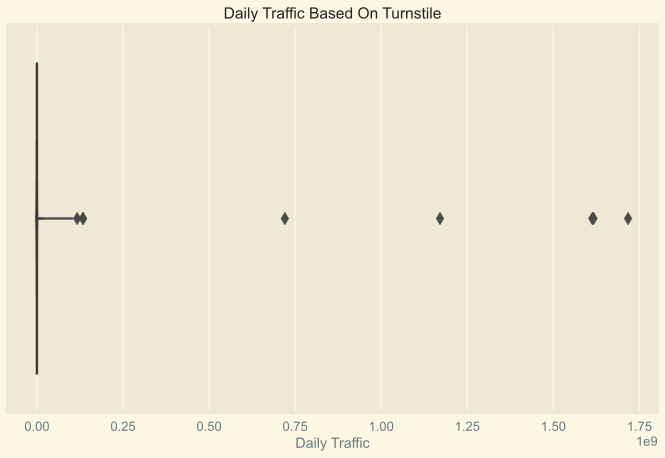

In [526]:
#Boxenplot for daily traffic

ax = sns.boxenplot(x='TRAFFIC', data=df_traffic).set(xlabel='Daily Traffic',title="Daily Traffic Based On Turnstile")

/Users/mada/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


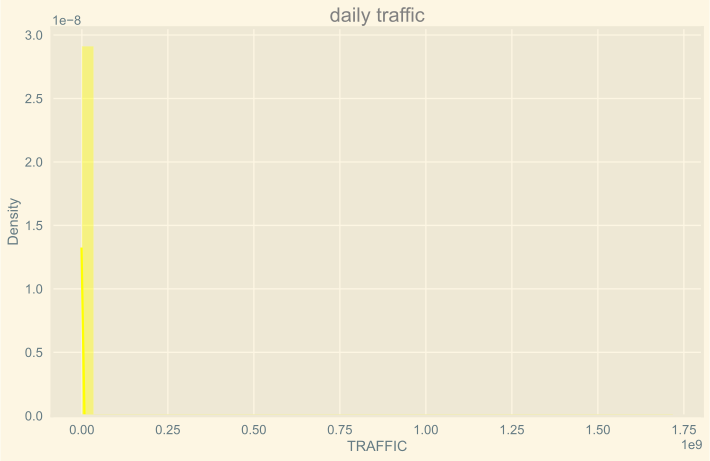

In [527]:
ax = sns.distplot(df_traffic["TRAFFIC"],color="yellow")
plt.title("daily traffic", color="gray", fontsize=20)
plt.savefig(" daily traffic.png")

/Users/mada/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


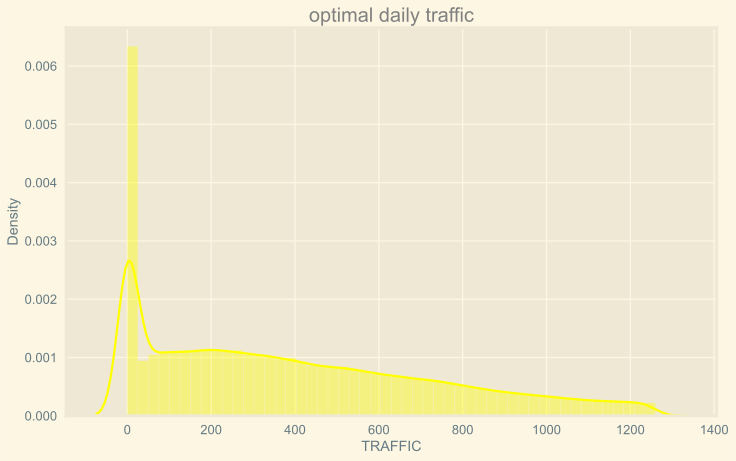

In [528]:
# Finding optimal daily traffic

percentile_traffic = df_traffic[df_traffic["TRAFFIC"]<(df_traffic.TRAFFIC.quantile(0.90))]
ax=sns.distplot(percentile_traffic["TRAFFIC"],color="yellow")
plt.title("optimal daily traffic", color="gray", fontsize=20)
plt.savefig("optimal daily traffic.png")

In [529]:
print("quantile 90%")
print(df_traffic["TRAFFIC"].quantile(0.90))
print("quantile 75%")
print(df_traffic["TRAFFIC"].quantile(0.75))
print("quantile 25")
print(df_traffic["TRAFFIC"].quantile(0.25))
print("Describe stst")
print(percentile_traffic.describe())

quantile 90%
1261.0
quantile 75%
772.0
quantile 25
137.0
Describe stst
             ENTRIES          EXITS        TRAFFIC
count  437352.000000  437352.000000  437352.000000
mean      209.232017     194.779804     404.011821
std       205.344560     200.843240     337.091825
min         0.000000       0.000000       0.000000
25%        37.000000      34.000000     112.000000
50%       157.000000     133.000000     341.000000
75%       321.000000     293.000000     637.000000
max      1231.000000    1260.000000    1260.000000


In [530]:

#Setting median values to giant values
df_traffic["TRAFFIC"][df_traffic["TRAFFIC"] > (df_traffic.TRAFFIC.quantile(0.90))] = df_traffic["TRAFFIC"].median()

<ipython-input-530-bf8e709ceced>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_traffic["TRAFFIC"][df_traffic["TRAFFIC"] > (df_traffic.TRAFFIC.quantile(0.90))] = df_traffic["TRAFFIC"].median()


In [531]:
df_traffic["TRAFFIC"].describe()

count    486031.000000
mean        403.480200
std         319.999587
min           0.000000
25%         137.000000
50%         397.000000
75%         598.000000
max        1261.000000
Name: TRAFFIC, dtype: float64

In [532]:
df_traffic.sort_values("TRAFFIC", ascending=False).head(10)

,TURNSTILE,STATION,DATE,DAY_NAME,ENTRIES,EXITS,TRAFFIC
433783,R509-R121-00-00-00,QUEENSBORO PLZ,10/18/2020,Sunday,850,411,1261
352212,R197-R117-00-00-01,V.CORTLANDT PK,09/17/2020,Thursday,805,456,1261
433918,R509-R121-00-00-01,QUEENSBORO PLZ,12/01/2020,Tuesday,871,390,1261
40826,B024-R211-00-00-00,KINGS HWY,10/10/2020,Saturday,688,573,1261
27858,A069-R044-01-00-00,CHAMBERS ST,11/19/2020,Thursday,131,1130,1261
288785,PTH13-R541-00-04-07,THIRTY ST,11/28/2020,Saturday,0,1261,1261
352098,R197-R117-00-00-00,V.CORTLANDT PK,09/01/2020,Tuesday,576,685,1261
389468,R249-R179-01-00-02,86 ST,11/17/2020,Tuesday,652,609,1261
193374,N315-R238-00-00-02,STEINWAY ST,10/06/2020,Tuesday,804,457,1261
429722,R501-R054-00-00-00,5 AVE,09/04/2020,Friday,263,998,1261


In [533]:
# Finding top 5 busiest stations based on traffic

top5 = df_traffic.groupby("STATION").sum().sort_values("TRAFFIC",ascending=False).head(5)
top5 = top5.reset_index()
top5

,STATION,ENTRIES,EXITS,TRAFFIC
0,34 ST-PENN STA,8887504,11135866,4790101
1,23 ST,1810476,1915205,3268921
2,FULTON ST,8199566,14649792,3168051
3,86 ST,12517803,3405884,2925725
4,34 ST-HERALD SQ,2899664,2777816,2826955


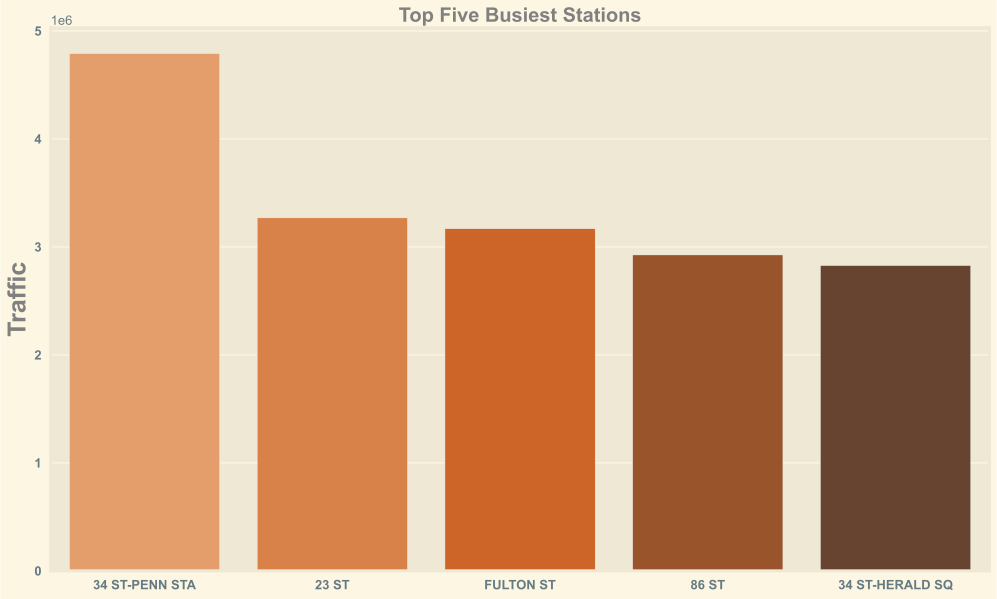

In [534]:
#Barplot for Top 5 Busiest Stations

plt.figure(figsize=(15,10),dpi=200),
#plt.style.use('Solarize_Light2')
ax = sns.barplot(x="STATION", y="TRAFFIC", data=top5,palette="Oranges_d")

plt.title("Top Five Busiest Stations", weight="bold", color="gray", fontsize=20)
plt.xlabel("",weight="bold",c="k")
plt.xticks(rotation=0, weight="bold")
plt.ylabel("Traffic",weight= "bold",c="gray",fontsize=25)

plt.yticks(weight="bold")

plt.savefig("TopFiveBusiestStations.png")
plt.show()

In [535]:
#from matplotlib import style

#print(plt.style.available)

In [536]:
#Solarize_Light2
#ggplot

In [537]:
# Finding busiest day based on traffic

df_busy = df_traffic.groupby("DAY_NAME").sum().sort_values("TRAFFIC",ascending=False)
df_busy = df_busy.reset_index()
df_busy

,DAY_NAME,ENTRIES,EXITS,TRAFFIC
0,Tuesday,952119815,651670761,30946827
1,Wednesday,54807899,50372815,30937212
2,Friday,432911492,358397363,30722499
3,Thursday,1711136009,222595502,30088066
4,Monday,77808898,65075057,29604614
5,Saturday,1157088397,509400969,23902025
6,Sunday,803197147,996316177,19902642


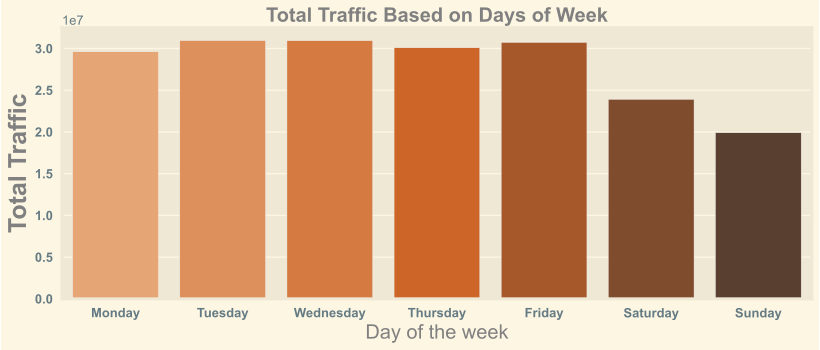

In [538]:
#total traffic
plt.figure(figsize=(12,5),dpi=200),

ax = sns.barplot(x="DAY_NAME",y="TRAFFIC",data=df_busy,palette="Oranges_d", order=["Monday","Tuesday","Wednesday","Thursday",
                                                                       "Friday","Saturday","Sunday"])

plt.title("Total Traffic Based on Days of Week", weight="bold", color="gray",fontsize=20)
plt.xlabel('Day of the week',color="gray",fontsize=20)
plt.ylabel("Total Traffic",weight= "bold",color="gray",fontsize=25)
plt.yticks(weight="bold")
plt.xticks(weight="bold")
plt.savefig('totaltrafficBassedOnDays.png', dpi=200)
plt.show()


In [539]:
#Descriptions of Original data
print('Descriptions of entries:')
print(df['ENTRIES'].describe())
print('')
print('Descriptions of exits:')
print(df['EXITS'].describe())

Descriptions of entries:
count    2.930896e+06
mean     4.225899e+07
std      2.171159e+08
min      0.000000e+00
25%      2.552720e+05
50%      1.671159e+06
75%      6.312835e+06
max      2.128749e+09
Name: ENTRIES, dtype: float64

Descriptions of exits:
count    2.930896e+06
mean     3.476297e+07
std      1.975599e+08
min      0.000000e+00
25%      1.030760e+05
50%      9.820185e+05
75%      4.185429e+06
max      2.123212e+09
Name: EXITS, dtype: float64


In [541]:
#Calculating busiest time
# group data by turnstile, sort each turnstile by datetime
# Create new columns DIFF_ENTRIES and DIFF_EXITS for each unique turnstile

df_time = df.sort_values(["TURNSTILE","STATION","DATE_TIME"]).reset_index()
df_time_grp = df_time.groupby(["TURNSTILE"])

df_time["DIFF_ENTRIES"] = df_time_grp["ENTRIES"].transform(pd.Series.diff)
df_time["DIFF_EXITS"] = df_time_grp["EXITS"].transform(pd.Series.diff)

df_time.head(5)

,index,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TURNSTILE,DATE_TIME,DAY_NAME,DIFF_ENTRIES,DIFF_EXITS
0,0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/29/2020,00:00:00,REGULAR,7450785,2533372,A002-R051-02-00-00,2020-08-29 00:00:00,Saturday,NaN,NaN
1,1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/29/2020,04:00:00,REGULAR,7450788,2533375,A002-R051-02-00-00,2020-08-29 04:00:00,Saturday,3.0,3.0
2,2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/29/2020,08:00:00,REGULAR,7450798,2533391,A002-R051-02-00-00,2020-08-29 08:00:00,Saturday,10.0,16.0
3,3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/29/2020,12:00:00,REGULAR,7450826,2533423,A002-R051-02-00-00,2020-08-29 12:00:00,Saturday,28.0,32.0
4,4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/29/2020,16:00:00,REGULAR,7450910,2533454,A002-R051-02-00-00,2020-08-29 16:00:00,Saturday,84.0,31.0


In [542]:
# check distribution of DIFF_ENTRIES  and DIFF_EXITS 
print('Descriptions of DIFF_ENTRIES:')
print(df_time["DIFF_ENTRIES"].describe())
print(" Descriptions of DIFF_EXITS:")
print(df_time["DIFF_EXITS"].describe())

Descriptions of DIFF_ENTRIES:
count    2.925876e+06
mean    -1.244259e+03
std      2.260654e+06
min     -1.309708e+09
25%      1.000000e+00
50%      1.700000e+01
75%      6.400000e+01
max      1.600010e+09
Name: DIFF_ENTRIES, dtype: float64
 Descriptions of DIFF_EXITS:
count    2.925876e+06
mean    -1.495456e+03
std      2.957827e+06
min     -1.973106e+09
25%      3.000000e+00
50%      1.800000e+01
75%      6.000000e+01
max      1.740393e+09
Name: DIFF_EXITS, dtype: float64


In [543]:
print("Number of negative DIFF_ENTRIES column: ")
print(len(df_time[df_time["DIFF_ENTRIES"]<0]))
print("Number of negative DIFF_EXITS column:")
print(len(df_time[df_time["DIFF_EXITS"]<0]))
print("Number of NaN rows:")
print(len(df_time[df_time['DIFF_ENTRIES'].isnull()]))

Number of negative DIFF_ENTRIES column: 
23155
Number of negative DIFF_EXITS column:
19057
Number of NaN rows:
5020


In [544]:
#Setting new values (median) for negative and higher than quantile (0.95)

df_time["DIFF_ENTRIES"] = df_time["DIFF_ENTRIES"].fillna(0)
df_time["DIFF_EXITS"] = df_time["DIFF_EXITS"].fillna(0)
df_time['DIFF_ENTRIES'][df_time['DIFF_ENTRIES'] < 0] = (df_time["DIFF_ENTRIES"].median())
df_time['DIFF_EXITS'][df_time['DIFF_EXITS'] < 0] = (df_time["DIFF_EXITS"].median())
df_time['DIFF_ENTRIES'][df_time['DIFF_ENTRIES'] > (df_time["DIFF_ENTRIES"].quantile(0.95))] = (df_time["DIFF_ENTRIES"].median()) 
df_time['DIFF_EXITS'][df_time['DIFF_EXITS'] > (df_time["DIFF_EXITS"].quantile(0.95))] = (df_time["DIFF_EXITS"].median())

<ipython-input-544-76b99626af36>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time['DIFF_ENTRIES'][df_time['DIFF_ENTRIES'] < 0] = (df_time["DIFF_ENTRIES"].median())
<ipython-input-544-76b99626af36>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time['DIFF_EXITS'][df_time['DIFF_EXITS'] < 0] = (df_time["DIFF_EXITS"].median())
<ipython-input-544-76b99626af36>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time['DIFF_ENTRI

In [545]:
# check distribution of DIFF_ENTRIES  and DIFF_EXITS 
print('Descriptions of DIFF_ENTRIES:')
print(df_time["DIFF_ENTRIES"].describe())
print(" Descriptions of DIFF_EXITS:")
print(df_time["DIFF_EXITS"].describe())

Descriptions of DIFF_ENTRIES:
count    2.930896e+06
mean     3.432157e+01
std      4.468874e+01
min      0.000000e+00
25%      1.000000e+00
50%      1.700000e+01
75%      5.000000e+01
max      1.980000e+02
Name: DIFF_ENTRIES, dtype: float64
 Descriptions of DIFF_EXITS:
count    2.930896e+06
mean     3.393296e+01
std      4.348710e+01
min      0.000000e+00
25%      3.000000e+00
50%      1.800000e+01
75%      4.700000e+01
max      2.010000e+02
Name: DIFF_EXITS, dtype: float64


In [546]:
#Calculating TRAFFIC column DIF_ENTRIES + DIF_EXITS
df_time["TRAFFIC"] = df_time["DIFF_ENTRIES"] + df_time["DIFF_EXITS"]
df_time.head(5)

,index,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TURNSTILE,DATE_TIME,DAY_NAME,DIFF_ENTRIES,DIFF_EXITS,TRAFFIC
0,0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/29/2020,00:00:00,REGULAR,7450785,2533372,A002-R051-02-00-00,2020-08-29 00:00:00,Saturday,0.0,0.0,0.0
1,1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/29/2020,04:00:00,REGULAR,7450788,2533375,A002-R051-02-00-00,2020-08-29 04:00:00,Saturday,3.0,3.0,6.0
2,2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/29/2020,08:00:00,REGULAR,7450798,2533391,A002-R051-02-00-00,2020-08-29 08:00:00,Saturday,10.0,16.0,26.0
3,3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/29/2020,12:00:00,REGULAR,7450826,2533423,A002-R051-02-00-00,2020-08-29 12:00:00,Saturday,28.0,32.0,60.0
4,4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/29/2020,16:00:00,REGULAR,7450910,2533454,A002-R051-02-00-00,2020-08-29 16:00:00,Saturday,84.0,31.0,115.0


/Users/mada/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TRAFFIC'>

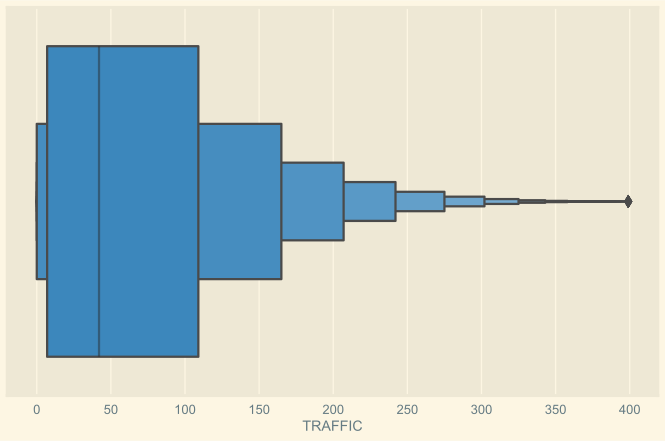

In [547]:
sns.boxenplot(df_time["TRAFFIC"])

In [548]:
df_time.groupby(["STATION"]).sum().sort_values("TRAFFIC", ascending=False).head(7)

,index,ENTRIES,EXITS,DIFF_ENTRIES,DIFF_EXITS,TRAFFIC
STATION,,,,,,
34 ST-PENN STA,5581540334,2791456596752,3029920133448,2231565.0,2379344.0,4610909.0
86 ST,4181023201,771868090744,1320717198500,1547374.0,1522679.0,3070053.0
23 ST,4174347998,3393917489984,3417020248239,1489777.0,1561465.0,3051242.0
FULTON ST,5176595027,2351405399547,2531852445366,1465005.0,1549690.0,3014695.0
125 ST,3076037095,3397277996987,2113618811807,1423168.0,1545497.0,2968665.0
34 ST-HERALD SQ,2361307592,1928153539512,2344789829356,1218726.0,1511430.0,2730156.0
GRD CNTRL-42 ST,8050173246,1438619006547,2012086666804,1220121.0,1411331.0,2631452.0


In [549]:
df_time_1=df_time[df_time["STATION"]=="34 ST-PENN STA"]

df_stations = df_time_1[['STATION', 'TIME', 'DAY_NAME','TRAFFIC']]

df_stations_grp = df_stations.groupby(['STATION','DAY_NAME','TIME'], as_index=False)
df_stations_grp = df_stations_grp[['TRAFFIC']].sum()
df_stations_grp['TIME'] = pd.to_datetime(df_stations_grp['TIME'], format='%H:%M:%S')


rounded_day_time = df_stations_grp.set_index('TIME').groupby(['STATION','DAY_NAME'])
rounded_day_time = rounded_day_time.resample("4H").sum()
rounded_day_time = rounded_day_time.reset_index()
rounded_day_time.head(6)

,STATION,DAY_NAME,TIME,TRAFFIC
0,34 ST-PENN STA,Friday,1900-01-01 00:00:00,56910.0
1,34 ST-PENN STA,Friday,1900-01-01 04:00:00,35043.0
2,34 ST-PENN STA,Friday,1900-01-01 08:00:00,139260.0
3,34 ST-PENN STA,Friday,1900-01-01 12:00:00,158538.0
4,34 ST-PENN STA,Friday,1900-01-01 16:00:00,190660.0
5,34 ST-PENN STA,Friday,1900-01-01 20:00:00,157832.0


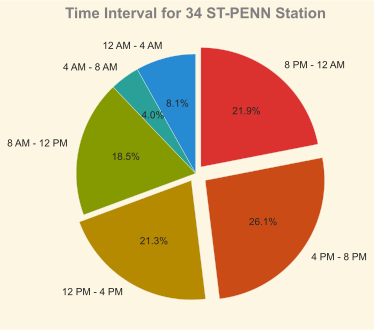

In [550]:
plt.style.use('seaborn-notebook')
#plt.style.use('Solarize_Light2')
#Solarize_Light2
#ggplot

fig2,ax2 = plt.subplots()

time = '12 AM - 4 AM','4 AM - 8 AM', '8 AM - 12 PM', '12 PM - 4 PM','4 PM - 8 PM','8 PM - 12 AM'
traffic = [51653, 25504, 117469, 135100, 165949 ,139363]
explode = (0, 0, 0, 0.07, 0.1 ,0.07)  
ax2.pie(traffic, explode=explode, labels=time, autopct='%1.1f%%', startangle=90)
plt.title("Time Interval for 34 ST-PENN Station", weight="bold", c="gray", fontsize=15)

plt.savefig("TimeIntervalFor34ST-PENNStation.png",dpi=200)
plt.show()

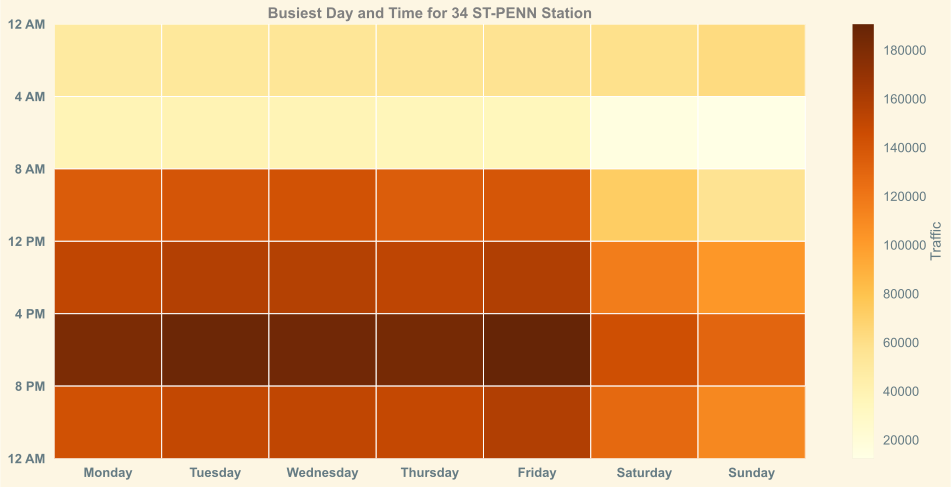

In [552]:
#Heatmap for top5 stations per day

df_heatman_hour = rounded_day_time.pivot(index="TIME", columns="DAY_NAME",values="TRAFFIC")
df_heatman_hour = df_heatman_hour[["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]]


plt.figure(figsize=(15,8),dpi=200),

sns.heatmap(df_heatman_hour,annot=False, linewidths=1, cmap="YlOrBr",cbar_kws={'label': 'Traffic'})
#plt.style.use('seaborn-talk')
plt.xlabel("")
plt.ylabel("")
plt.yticks(weight="bold")
plt.yticks([0,1,2,3,4,5,6],["12 AM","4 AM","8 AM","12 PM","4 PM","8 PM","12 AM"])
plt.xticks(weight="bold")
plt.title("Busiest Day and Time for 34 ST-PENN Station",weight="bold",color="gray", fontsize=15)
ax.xaxis.get_majorticklabels()[2].set_x(-.5)

plt.savefig("heatmapforBusiestDayandTime.png")

#  Handling in sql

In [553]:
from sqlalchemy import create_engine

In [554]:
engine = create_engine('sqlite://',echo=False)
df.to_sql('mta', con=engine)
x = pd.read_sql('SELECT * FROM mta ORDER BY STATION limit 10;', engine)
x

,index,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TURNSTILE,DATE_TIME,DAY_NAME
0,32175,H007,R248,00-00-00,1 AV,L,BMT,08/29/2020,00:00:00,REGULAR,15470879,17378563,H007-R248-00-00-00,2020-08-29 00:00:00.000000,Saturday
1,32177,H007,R248,00-00-00,1 AV,L,BMT,08/29/2020,08:00:00,REGULAR,15470894,17378700,H007-R248-00-00-00,2020-08-29 08:00:00.000000,Saturday
2,32178,H007,R248,00-00-00,1 AV,L,BMT,08/29/2020,12:00:00,REGULAR,15470949,17378915,H007-R248-00-00-00,2020-08-29 12:00:00.000000,Saturday
3,32179,H007,R248,00-00-00,1 AV,L,BMT,08/29/2020,16:00:00,REGULAR,15471070,17379160,H007-R248-00-00-00,2020-08-29 16:00:00.000000,Saturday
4,32180,H007,R248,00-00-00,1 AV,L,BMT,08/29/2020,20:00:00,REGULAR,15471211,17379377,H007-R248-00-00-00,2020-08-29 20:00:00.000000,Saturday
5,32181,H007,R248,00-00-00,1 AV,L,BMT,08/30/2020,00:00:00,REGULAR,15471302,17379522,H007-R248-00-00-00,2020-08-30 00:00:00.000000,Sunday
6,32182,H007,R248,00-00-00,1 AV,L,BMT,08/30/2020,04:00:00,REGULAR,15471307,17379542,H007-R248-00-00-00,2020-08-30 04:00:00.000000,Sunday
7,32183,H007,R248,00-00-00,1 AV,L,BMT,08/30/2020,08:00:00,REGULAR,15471320,17379624,H007-R248-00-00-00,2020-08-30 08:00:00.000000,Sunday
8,32184,H007,R248,00-00-00,1 AV,L,BMT,08/30/2020,12:00:00,REGULAR,15471403,17379805,H007-R248-00-00-00,2020-08-30 12:00:00.000000,Sunday
9,32185,H007,R248,00-00-00,1 AV,L,BMT,08/30/2020,16:00:00,REGULAR,15471470,17380067,H007-R248-00-00-00,2020-08-30 16:00:00.000000,Sunday


In [559]:
station_grp = pd.read_sql("""SELECT STATION, COUNT(DISTINCT(unit)) FROM mta GROUP BY STATION ORDER BY COUNT(DISTINCT unit) DESC LIMIT 5""",engine)
print(station_grp)

           STATION  COUNT(DISTINCT(unit))
0            23 ST                      6
1         CANAL ST                      5
2            86 ST                      5
3  GRD CNTRL-42 ST                      4
4   34 ST-PENN STA                      4


In [560]:
station_uniq = pd.read_sql("""SELECT COUNT(DISTINCT(STATION)) FROM mta """,engine)
print(station_uniq)

   COUNT(DISTINCT(STATION))
0                       379
